In [1]:
%load_ext autoreload
%autoreload 1

import sys
sys.path.append("../utils")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

%matplotlib inline

from statsmodels.tsa.seasonal import seasonal_decompose

from time_series_utils import *

%aimport time_series_utils

In [2]:
data = pd.read_csv("../data/interum/track_data.zip")

In [3]:
day_df = data[data.release_date_precision == "day"].copy()

## Converting to datetime and dealing with missing values

In [4]:
day_df.release_date = day_df.release_date.apply(convert_to_datetime)

In [5]:
day_df.dropna(inplace=True)

In [6]:
ts_df = day_df.sort_values("release_date").set_index("release_date").copy()
ts_df.to_csv("../data/interum/day_timeseries.csv")

In [7]:
ts_df = ts_df.resample("m").mean()

In [8]:
ts_df.head()

,Danceability,Energy,Key,Loudness,Mode,Speechness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,time_signature
release_date,,,,,,,,,,,,,
1899-12-31,0.564333,0.0543,4.333333,-23.957333,1.0,0.038767,0.972333,0.78,0.109333,0.520333,112.514333,153493.0,4.0
1900-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1900-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1900-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1900-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Feature plotting

## Loudness from 1970

Check for NAs in our date range. This is needed for decomposition later

In [9]:
ts_df["1970":].Loudness.isna().sum()

2

fill nas with previous value

In [10]:
ts_df["1970":].Loudness = ts_df["1970":].Loudness.fillna(method="ffill").copy()

/home/qdizon/.local/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


### Initial plot of loudness

Seems to indicate that there is high variability until around 2000 when we see loudness become more standardized. No clear seasonality.

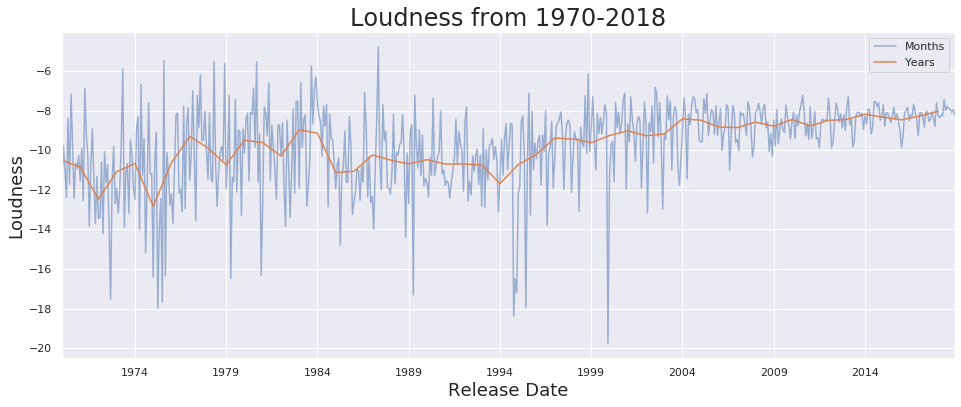

In [11]:
plot_feature(ts_df, feature="Loudness", start="1970")

Decomposition to see trend and risiduals  

Supports initial assessment that variability reduces over time (after 2000 or so). 

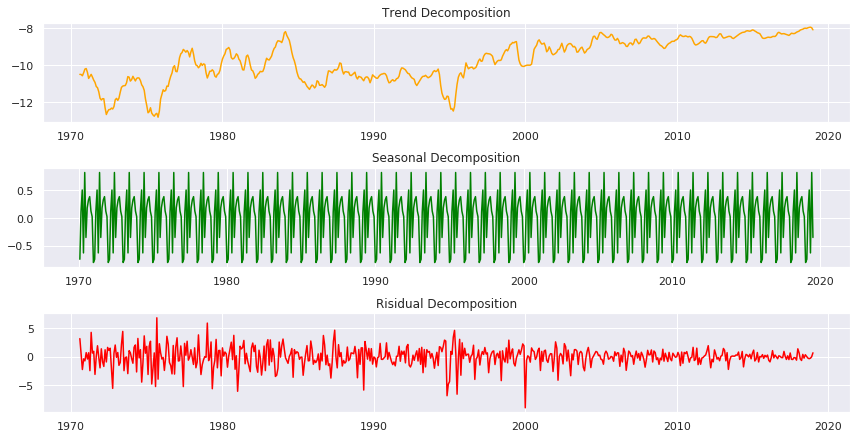

In [12]:
decomposition = seasonal_decompose(ts_df["1970":].Loudness)

# Gather the trend, seasonality and risidual (noise) of decomposed object
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the various graphs
plt.figure(figsize=(12,8))

plt.subplot(412)
plt.plot(trend, label='Trend', color="orange")
plt.title("Trend Decomposition")

plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color="green")
plt.title("Seasonal Decomposition")

plt.subplot(414)
plt.plot(residual, label='Residuals', color="red")
plt.title("Risidual Decomposition")

plt.tight_layout()

## Speechness Time Series Analysis

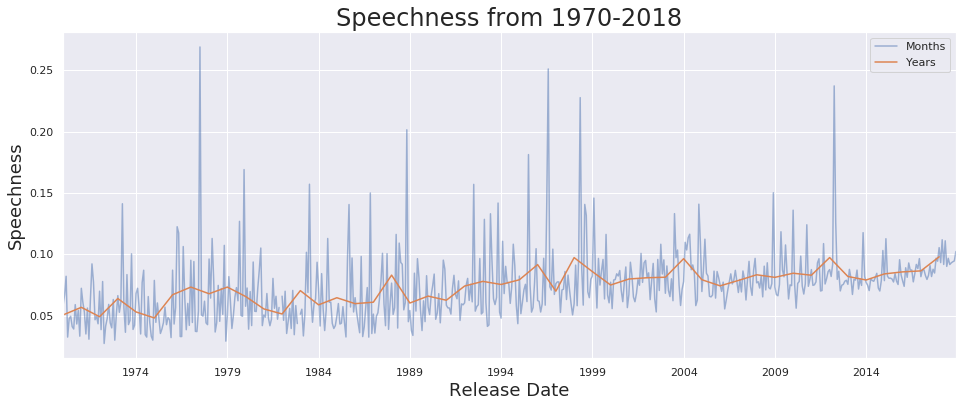

In [13]:
plot_feature(ts_df, feature="Speechness", start="1970")

## Tempo Time Series Analysis

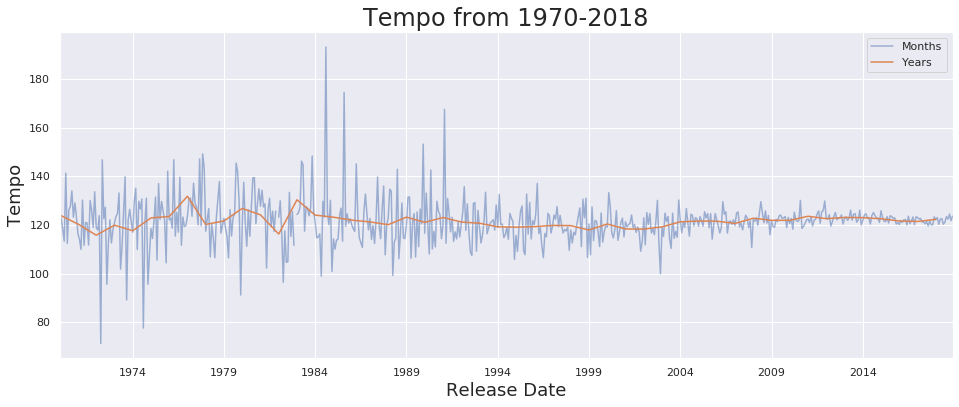

In [14]:
plot_feature(ts_df, feature="Tempo", start="1970")

## Duration Time Series Analysis

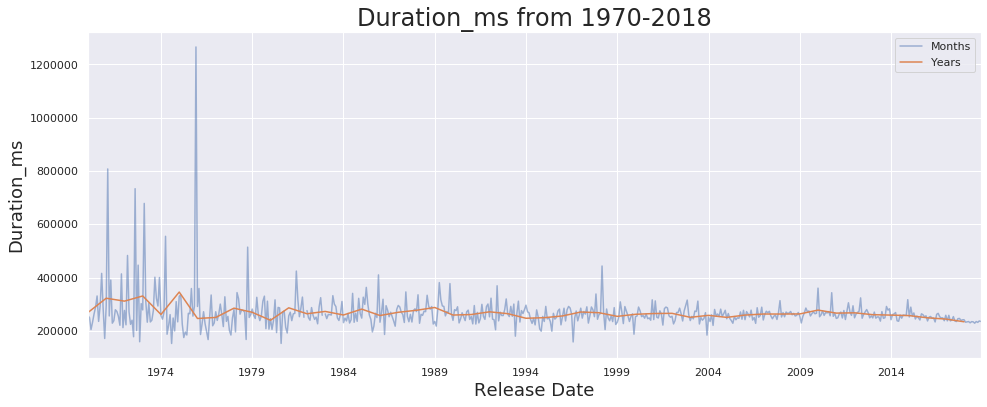

In [15]:
plot_feature(ts_df, feature="Duration_ms", start="1970")

## Valance & Mode

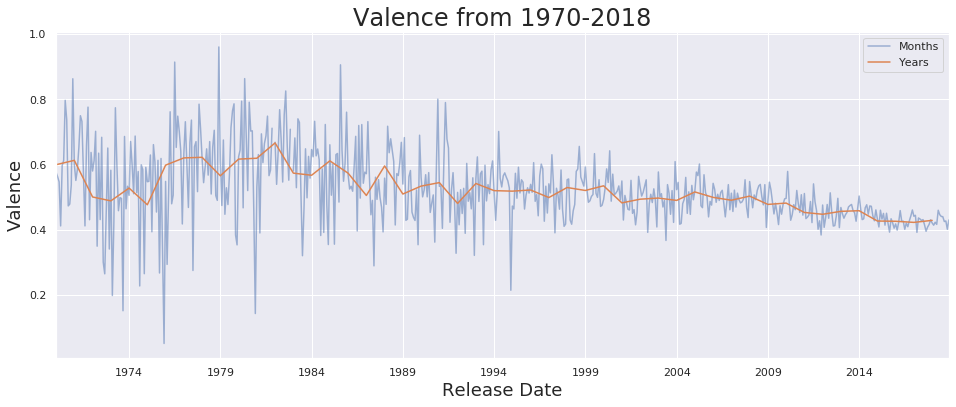

In [16]:
plot_feature(ts_df, feature="Valence", start="1970")

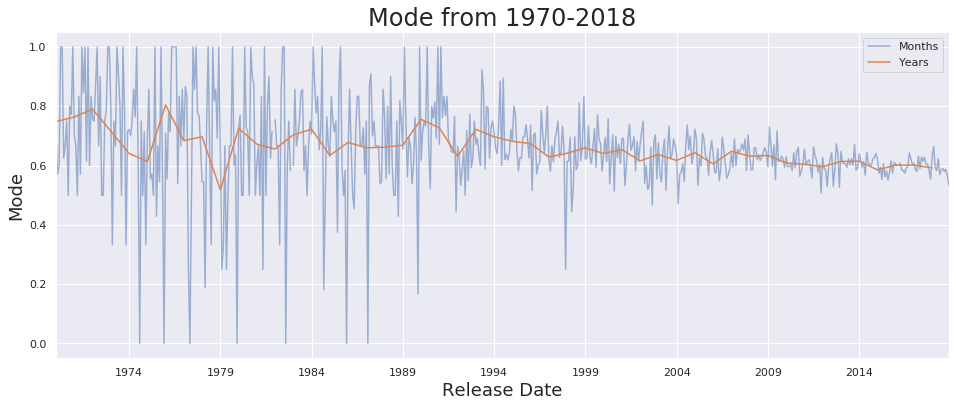

In [17]:
plot_feature(ts_df, feature="Mode", start="1970")

## Energy

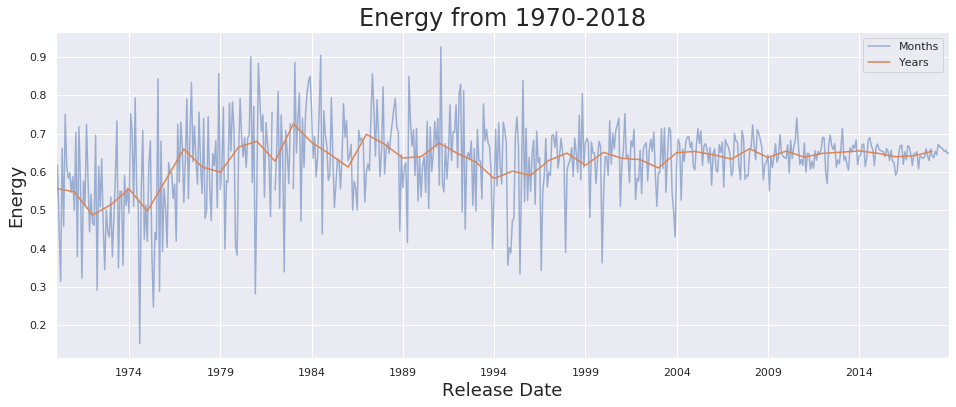

In [18]:
plot_feature(ts_df, feature="Energy", start="1970")

## Key

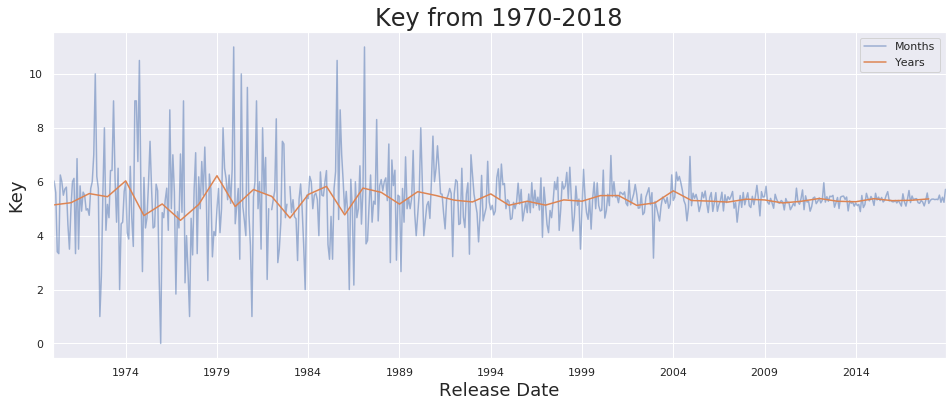

In [19]:
plot_feature(ts_df, feature="Key", start="1970")

## Acousticness

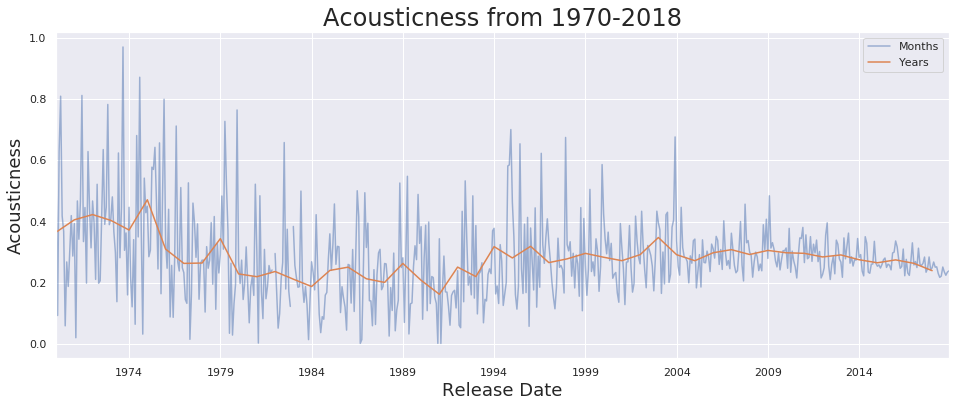

In [20]:
plot_feature(ts_df, feature="Acousticness", start="1970")

# Summary of Initial Findings:

#### Main Observation:

_For all plotted features, it appears that variability reduces over time._

One possible reason for this is that there have been more recorded releases in recent years. Past variability could be partially explained by having fewer samples. However, this would only explain the trend in variance of each feature and not _**why**_ the variance is small for recent features.  

In other words, we cannot definitively say that there is a trend towards less variance, but we can comment on the general lack of varience in recent releases. 

***

In [37]:
ts_df.columns

Index(['Danceability', 'Energy', 'Key', 'Loudness', 'Mode', 'Speechness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'time_signature'],
      dtype='object')

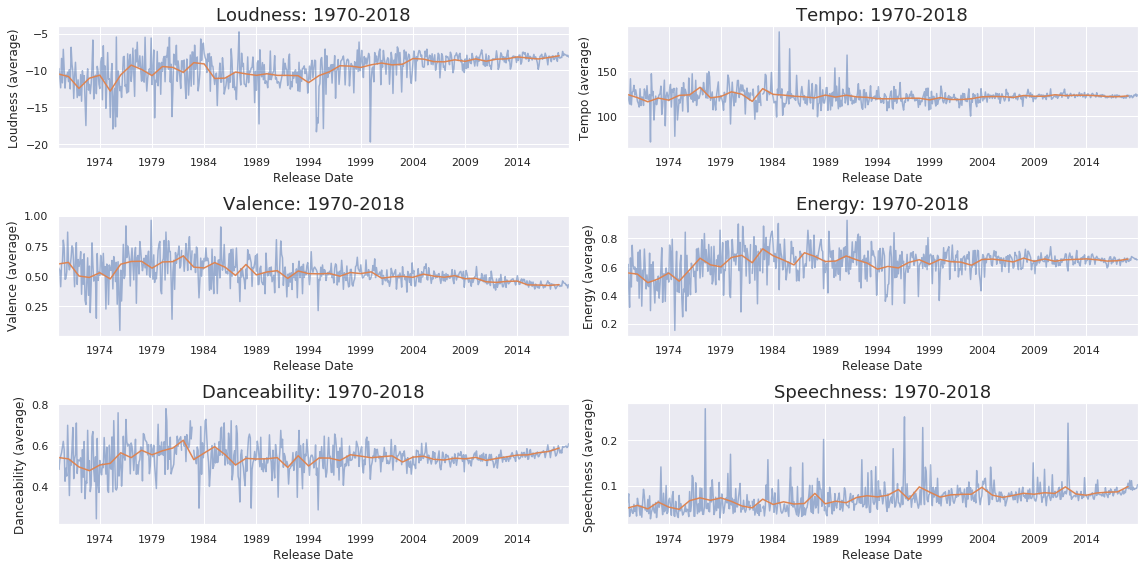

In [40]:
ts_plot_group(ts_df, ["Loudness", "Tempo", "Valence", "Energy", "Danceability", "Speechness"], start="1970")